In [5]:
import axelrod as axl
import pandas as pd

from keras.models import load_model

In [2]:
import numpy as np

In [3]:
import imp

player_class = imp.load_source('player_class', 'player_class.py')

In [4]:
axl.__version__

'4.2.0'

**the trained model**

**from GPU**

In [6]:
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, CuDNNLSTM
from keras.models import Sequential

In [7]:
num_hidden_cells = 200
drop_out_rate = 0.2

In [9]:
model = Sequential()

model.add(
        LSTM(200, return_sequences=True, input_shape=(None, 1))
    )

model.add(Dropout(rate=drop_out_rate))

model.add(Dense(1, activation="sigmoid"))
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)


In [10]:
model.load_weights('best_weights.h5')

In [7]:
model = load_model('output/lstm_model_200_5_2000.h5')

In [ ]:
model.save_weights('')

In [11]:
sequence = np.array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [12]:
model.predict(sequence.reshape(1, len(sequence), 1))

array([[[0.7787802 ],
        [0.6965292 ],
        [0.60471517],
        [0.54021645],
        [0.6218485 ],
        [0.6849445 ],
        [0.704108  ],
        [0.70078504],
        [0.6886417 ],
        [0.676175  ]]], dtype=float32)

**create player**

In [13]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_simple_model)

**check that can interact with other players**

In [14]:
match = axl.Match([player, axl.Defector()], turns=200)
_ = match.play()

**in a tournament with basic strategies**

In [15]:
strategies = [s() for s in axl.basic_strategies] + [player]

In [16]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)

In [17]:
results = tournament.play()

Analysing:   0%|          | 0/25 [00:00<?, ?it/s]//anaconda3/envs/rnn/lib/python3.6/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "
Analysing: 100%|██████████| 25/25 [00:00<00:00, 81.39it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


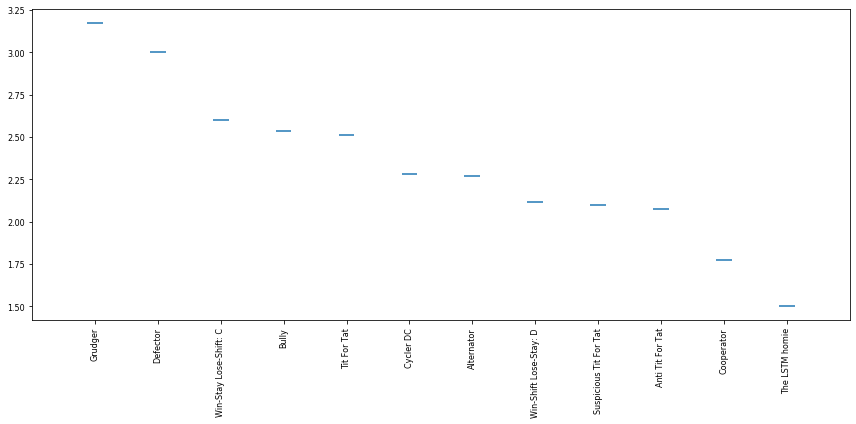

In [18]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [19]:
filterset = {
         'stochastic': True,
        'long_run_time': False,
}
strategies_list = axl.filtered_strategies(filterset)

In [20]:
len(strategies_list)

66

In [21]:
strategies = [s() for s in strategies_list[:10]] + [player]

In [22]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 107.52it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


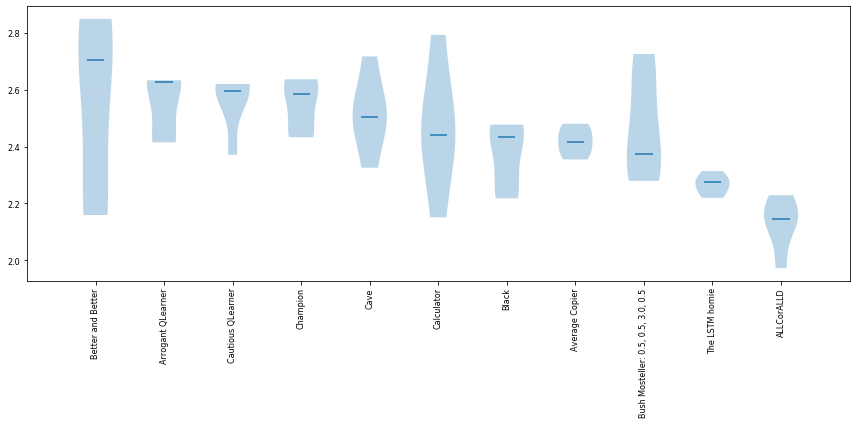

In [23]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Axelrod's first tournament**

In [24]:
strategies = [axl.TitForTat(), axl.TidemanAndChieruzzi(), axl.Nydegger(), axl.Grofman(),
              axl.Shubik(), axl.SteinAndRapoport(), axl.Grudger(), axl.Davis(),
              axl.RevisedDowning(), axl.Feld(), axl.Joss(),
              axl.Tullock(), axl.UnnamedStrategy(), axl.Random()] + [player]

In [25]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 93.72it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


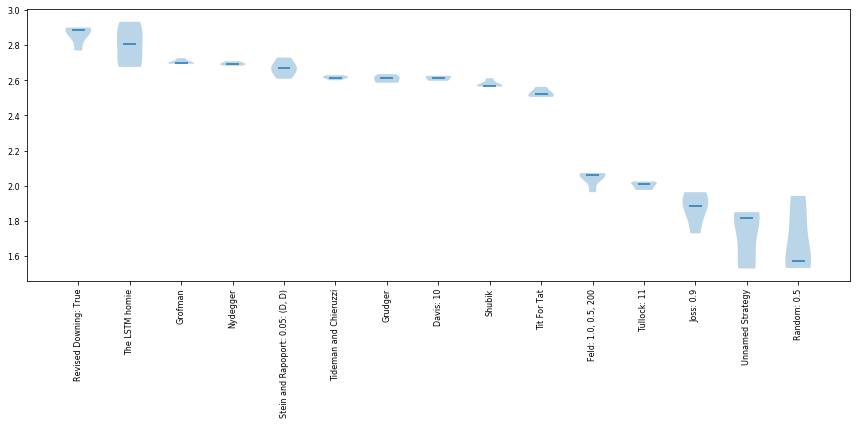

In [26]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Press and Dyson's tournament**

In [27]:
strategoes = [axl.Cooperator(),
                axl.Defector(),
                axl.ZDExtort2(),
                axl.HardGoByMajority(),
                axl.Joss(),
                axl.HardTitForTat(),
                axl.HardTitFor2Tats(),
                axl.TitForTat(),
                axl.Grudger(),
                axl.GTFT(),
                axl.TitFor2Tats(),
                axl.WinStayLoseShift(),
                axl.Random(),
                axl.ZDGTFT2()] + [player]

In [28]:
tournament = axl.Tournament(players=strategies, turns=205, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 101.40it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


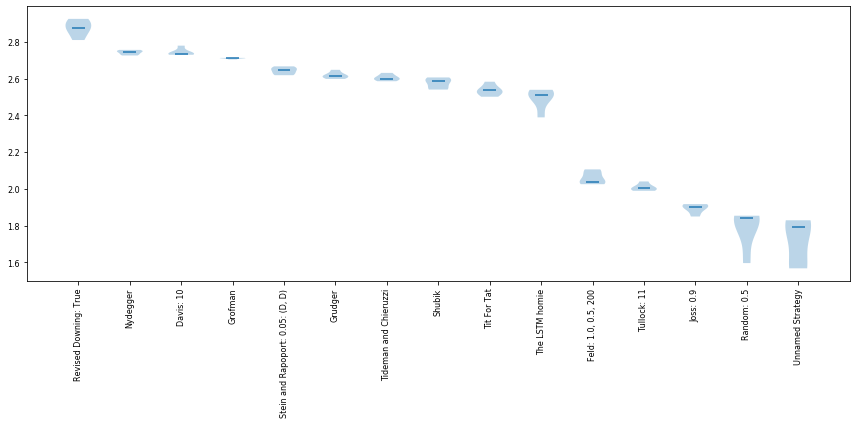

In [29]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()